In [2]:
import graph_tool as gt
import numpy as np
from graph_tool import collection,inference
import matplotlib.pyplot as plt

In [8]:
G = gt.load_graph_from_csv('contact_Interaction2.csv',eprop_types=["int","int","int"],
                           eprop_names=["StartTime","EndTime","Duration"],skip_first=True)
Ga2 = G.copy()
Ga2.remove_vertex(range(48,-1,-1))

In [13]:
G = gt.load_graph_from_csv('ants_data.csv',eprop_types=["int","int"],
                           eprop_names=["StartTime","EndTime"],skip_first=True)
G.num_edges()
G.set_fast_edge_removal(fast=True)

In [6]:
state_ndc = gt.inference.minimize_nested_blockmodel_dl(Ga2, state_args=dict(deg_corr=False))
state_dc  = gt.inference.minimize_nested_blockmodel_dl(Ga2, state_args=dict(deg_corr=True))

print("Non-degree-corrected DL:\t", state_ndc.entropy())
print("Degree-corrected DL:\t", state_dc.entropy())
print(u"ln \u039b in bee network: ", state_ndc.entropy() - state_dc.entropy())

Non-degree-corrected DL:	 4156.21502869132
Degree-corrected DL:	 4124.179157282323
ln Λ in bee network:  32.03587140899708


In [20]:
state_ndc = gt.inference.minimize_nested_blockmodel_dl(G, state_args=dict(deg_corr=False))
state_dc  = gt.inference.minimize_nested_blockmodel_dl(G, state_args=dict(deg_corr=True))

print("Non-degree-corrected DL:\t", state_ndc.entropy())
print("Degree-corrected DL:\t", state_dc.entropy())
print(u"ln \u039b in ant network: ", state_ndc.entropy() - state_dc.entropy())

Non-degree-corrected DL:	 3188.3785206050416
Degree-corrected DL:	 3149.1488978435655
ln Λ in ant network:  39.229622761476094


In [5]:
state = gt.inference.minimize_nested_blockmodel_dl(G, state_args=dict(deg_corr=False))
state.print_summary()

l: 0, N: 89, B: 44
l: 1, N: 44, B: 7
l: 2, N: 7, B: 1
l: 3, N: 1, B: 1


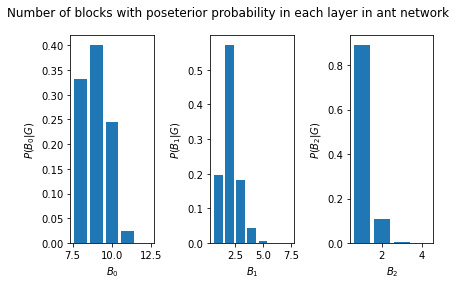

In [6]:
h = [np.zeros(G.num_vertices() + 1) for s in state.get_levels()]

def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1

# Now we collect the marginal distribution for exactly 100,000 sweeps
gt.inference.mcmc_equilibrate(state, force_niter=5000, mcmc_args=dict(niter=10),
                    callback=collect_num_groups)
fig,ax = plt.subplots()
fig.suptitle("Number of blocks with poseterior probability in each layer in ant network")
plt.subplot(131)
index_nonempty1 = [i for i in range(len(h[1])) if h[1][i]]
nonempty_h1 = np.array([i for i in h[1] if i])
plt.bar(index_nonempty1,nonempty_h1/sum(h[1]))
plt.xlabel(r"$B_0$")
plt.ylabel(r"$P(B_0|G)$")
plt.subplot(132)
index_nonempty2 = [i for i in range(len(h[2])) if h[2][i]]
nonempty_h2 = np.array([i for i in h[2] if i])
plt.bar(index_nonempty2,nonempty_h2/sum(h[2]))
plt.xlabel(r"$B_1$")
plt.ylabel(r"$P(B_1|G)$")
plt.subplot(133)
index_nonempty3 = [i for i in range(len(h[3])) if h[3][i]]
nonempty_h3 = np.array([i for i in h[3] if i])
plt.bar(index_nonempty3,nonempty_h3/sum(h[3]))
plt.xlabel(r"$B_2$")
plt.ylabel(r"$P(B_2|G)$")
fig.tight_layout()

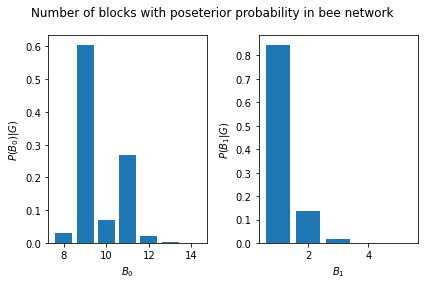

In [5]:
state  = gt.inference.minimize_nested_blockmodel_dl(Ga2, state_args=dict(deg_corr=True))
h = [np.zeros(Ga2.num_vertices() + 1) for s in state.get_levels()]
def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1

# Now we collect the marginal distribution for exactly 100,000 sweeps
gt.inference.mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10),
                    callback=collect_num_groups)
fig,ax = plt.subplots()
fig.suptitle("Number of blocks with poseterior probability in bee network")
plt.subplot(121)
index_nonempty0 = [i for i in range(len(h[0])) if h[0][i]]
nonempty_h0 = np.array([i for i in h[0] if i])
plt.bar(index_nonempty0,nonempty_h0/sum(h[0]))
plt.xlabel(r"$B_0$")
plt.ylabel(r"$P(B_0)|G)$")
plt.subplot(122)
index_nonempty1 = [i for i in range(len(h[1])) if h[1][i]]
nonempty_h1 = np.array([i for i in h[1] if i])
plt.bar(index_nonempty1,nonempty_h1/sum(h[1]))
plt.xlabel(r"$B_1$")
plt.ylabel(r"$P(B_1|G)$")
fig.tight_layout()